<a href="https://colab.research.google.com/github/emeraldgoose/kiwoomPytrader/blob/master/005930_KS_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [72]:
data = pd.read_csv('/content/drive/My Drive/Tensorflow/005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-27,24580.0,24940.0,24560.0,24600.0,248.276459,12152000.0
1,2015-07-28,24480.0,25020.0,24380.0,24600.0,248.276459,13381350.0
2,2015-07-29,25000.0,25500.0,24620.0,25260.0,254.937500,13734450.0
3,2015-07-30,25160.0,25200.0,24300.0,24300.0,245.248688,15419600.0
4,2015-07-31,24400.0,24440.0,23500.0,23700.0,239.193115,19579450.0


In [73]:
# 결측치 제거
# 안하면 학습할 때 loss 값이 nan이 된다
dataset = data.dropna()

In [74]:
# Compute Mid Price
high_prices = dataset['High'].values
low_prices = dataset['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [75]:
mid_prices

array([24750., 24700., 25060., ..., 54250., 54050., 55000.])

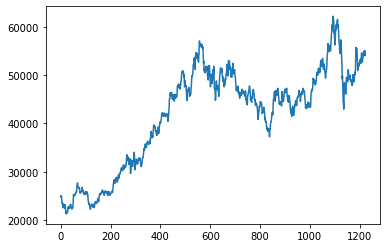

In [76]:
plt.plot(mid_prices)

In [77]:
# Create Windows
# Window size=50
seq_len=50
sequence_length = seq_len+1

result = []
for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index: index + sequence_length])

In [78]:
# Nomalize Data
normalized_data = []

for window in result:
  normalized_window = [((float(p) / float(window[0])) -1) for p in window]
  normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
# training set 90%, test set 10%
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
# 랜덤 셔플 필요
np.random.shuffle(train)

# x_train에 50개, y_train에 1개 (50개 학습 -> 1개 예측)
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:,-1]

# x_test에 50개, y_test에 1개
x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:,-1]

x_train.shape, x_test.shape

((1055, 50, 1), (117, 50, 1))

In [79]:
# Build a Model
model = Sequential()
# LSTM unit 개수 50, input size=50
#model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
# LSTM unit 개수 64
#model.add(LSTM(64, return_sequences=False))
# LSTM model
model.add(LSTM(16, input_shape=(50,1), activation='relu', return_sequences=False))
# output size=1
model.add(Dense(1))
# loss func = Mean Squared Error, optimizer = adam
model.compile(loss='mse', optimizer='adam')
# 모델의 개요 출력
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 16)                1152      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Training
# batch_size : 한 묶음안 데이터 개수, epochs = 학습 사이클
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=20)

Train on 1055 samples, validate on 117 samples
Epoch 1/20
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 2/20
1055/1055 [==============================] - 2s 1ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 3/20
1055/1055 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 4/20
1055/1055 [==============================] - 1s 1ms/step - loss: 7.3707e-04 - val_loss: 0.0013
Epoch 5/20
1055/1055 [==============================] - 1s 1ms/step - loss: 6.1657e-04 - val_loss: 0.0011
Epoch 6/20
1055/1055 [==============================] - 1s 1ms/step - loss: 5.4311e-04 - val_loss: 0.0012
Epoch 7/20
1055/1055 [==============================] - 1s 1ms/step - loss: 4.9216e-04 - val_loss: 0.0010
Epoch 8/20
1055/1055 [==============================] - 1s 1ms/step - loss: 4.5778e-04 - val_loss: 8.0110e-04
Epoch 9/20
1055/1055 [==============================] - 1s 1ms/step - loss: 4.4874e-04 - val_loss: 7.6810e-04
Epo

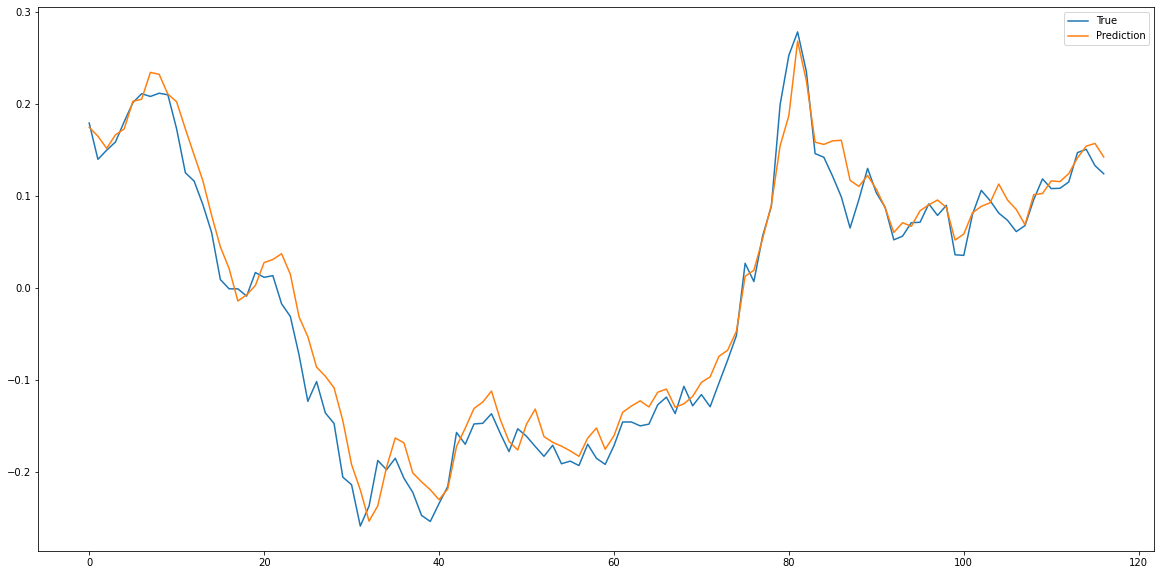

In [81]:
# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()